__Name__: Ameen Oladehinde-Bello
__Student Number__: 21034095

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline

We will first take a look at the data itself and familiarise ourselves with the overall structure of the data by printing some information on the dataset as well as having a look at the first five values in the dataset

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


It looks like the dataset has the following nature (this is written before having a more detailed look at the data and starting transformations so some of these assumptions maybe amended later in the notebook):
1. The majority of the features in the dataset are non-numerical. Categories such as job, education, housing, loan, month, poutcome and subscribed are all categorical variables and will have to be converted to some sort of numerical medium. Month is the only categorical feature of the set that is ordinal meaning it will have to be treated slightly different to the others
2. Age, balance, duration, pdays are the main numerical attributes of the dataset that will need to have outliers potentially dealt with as well as their values scaled. These values can also more readily be used to create some sort of new feature in the dataset.

## Dealing with Missing Values and Encoding Categorical Variables

Before doing any operations it is important to identify the columns with missing values, this allows us to consider how to fill in those missing values before we do any other sort of operation on the data as part of the data wrangling process

In [5]:
data_copy = data.copy()

In [6]:
data_copy.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

The missing values in the data set are present in the columns: `age`, `education`, `contact`, `poutcome`

The first categorical feature we will deal with is `month`, This feature is ordinal, meaning the categorical values have a well defined order . Below we look at the unique values of that feature and then encode them appropriately

In [7]:
data_copy.month.unique()

array(['apr', 'dec', 'feb', 'jan', 'mar', 'may', 'nov', 'oct', 'aug',
       'jul', 'jun', 'sep'], dtype=object)

In [8]:
# the column represents months of the year, so we will assign values from 1-12 for each month

month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

data_copy['month'] = data_copy['month'].replace(month_mapping)
data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no


We will now deal with the rest of the categorical features, dealing firstly with the columns that do not contain any missing values.

In [9]:
data_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
data_copy = pd.get_dummies(data_copy, columns=['marital', 'default', 'housing', 'loan', 'subscribed'], drop_first=True, dummy_na=False)
data_copy.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,technician,tertiary,392,cellular,1,4,957,2,131,2,failure,0,1,0,1,0,0
1,39.0,technician,secondary,688,cellular,1,4,233,2,133,1,failure,0,0,0,1,1,0
2,59.0,retired,secondary,1035,cellular,1,4,126,2,239,1,failure,1,0,0,1,1,0
3,47.0,blue-collar,secondary,398,cellular,1,4,274,1,238,2,failure,1,0,0,1,1,0
4,54.0,retired,secondary,1004,cellular,1,4,479,1,307,1,failure,1,0,0,1,0,0


To deal with the rest of the nominal categorical fields in the dataset we must first fill in the missing values in each column. The categorical features with missing values are `education`, `job`, `contact` and `poutcome`.
Firstly we will look at the distribution of each of the features in the dataset

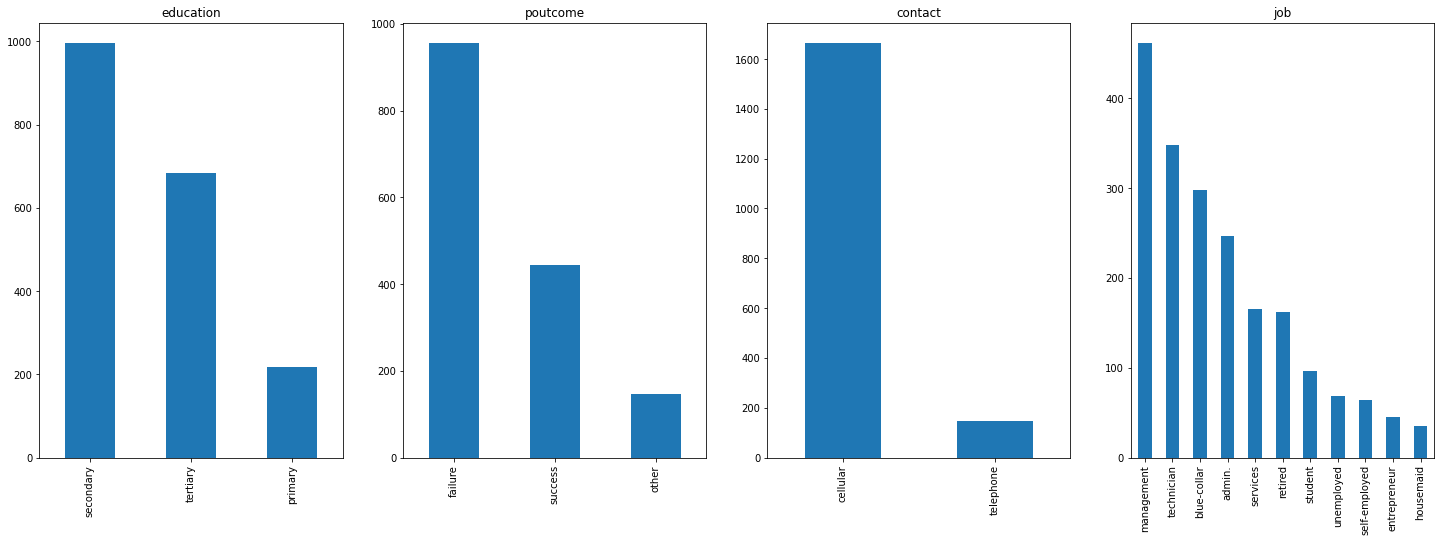

In [11]:
categorical_features = ['education', 'poutcome', 'contact', 'job']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(25,8))
for i, categorical_feature in enumerate(data[categorical_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

Taking a look at the `contact` feature first, since the overwhelming majority of people have been contacted via cellular means, it can be safely assumed that a person whose means of contact is missing was overwhelmingly more likely to have been contacted via cellular. Based on this we will replace all the missing values for that column with cellular

In the case of the `poutcome` column, since there is a category that represents something __other__ which could mean not recorded or some other unspecified outcome, as a result the missing values will be replaced with this.

In the case of the missing values in the `job` column seeing as only 10 values are missing (0.5%) of the data, it makes sense to use the mode of that column, as this wil not affect the data too negatively. In this case the missing values will be replaced with `management`.

For the `education` column, we can use some intuition and rightly assume that the majority of people in any population of any kind will most likely have a secondary level of education. As a result the missing values will be replaced with this value

The above operations are carried out below

In [12]:
data_copy.fillna({'contact':'cellular', 'poutcome': 'other', 'job': 'management', 'education': 'secondary'}, inplace=True)

After filling in these missing values we can now encode the rest of the categorical features, this is done below

In [13]:
data_copy.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,technician,tertiary,392,cellular,1,4,957,2,131,2,failure,0,1,0,1,0,0
1,39.0,technician,secondary,688,cellular,1,4,233,2,133,1,failure,0,0,0,1,1,0
2,59.0,retired,secondary,1035,cellular,1,4,126,2,239,1,failure,1,0,0,1,1,0
3,47.0,blue-collar,secondary,398,cellular,1,4,274,1,238,2,failure,1,0,0,1,1,0
4,54.0,retired,secondary,1004,cellular,1,4,479,1,307,1,failure,1,0,0,1,0,0


In [14]:
data_copy = pd.get_dummies(data_copy, columns=['contact', 'poutcome', 'job', 'education'], drop_first=True, dummy_na=False)
data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,32.0,392,1,4,957,2,131,2,0,1,...,0,0,0,0,0,0,1,0,0,1
1,39.0,688,1,4,233,2,133,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,59.0,1035,1,4,126,2,239,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,398,1,4,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,1,0
4,54.0,1004,1,4,479,1,307,1,1,0,...,0,0,1,0,0,0,0,0,1,0


We will now look at how to fill in the missing values for age. To do this, we will take some inspiration from the previous exploratory data analysis etivity (the assumption here is that in a practical scenario that step would be done before starting the process of data wrangling). We will look at how the age relates to whether a person is subscribed, the nature of this relationship will be used to determine how to fill in the missing values. subscribed_yes is used in this case as it is the target variable, this same process can be followed for any of the other categories features.

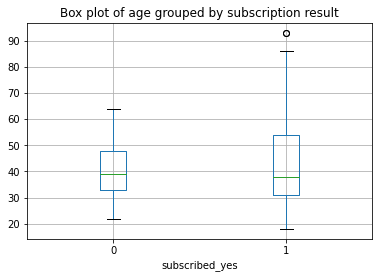

In [15]:
data_copy.boxplot(column='age', by='subscribed_yes')
plt.title('Box plot of age grouped by subscription result')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is a variation in the median value of age based on whether a person is subscribed or not, to further investigate the relationship between age and the new `subscribed_yes` column, we do a `goupby` analysis below 

In [16]:
data_copy.groupby('subscribed_yes')['age'].describe()['mean']

subscribed_yes
0    40.655903
1    42.843531
Name: mean, dtype: float64

We will replace the missing values with the mean value corresponding to whether that row is a subscribed person or not

In [17]:
def replace_age(x):
    return data_copy.groupby('subscribed_yes')['age'].describe()['mean'][x]

data_copy['age'].fillna(data_copy['subscribed_yes'].apply(replace_age), inplace=True)

# we can see that all missing values have been dealt with
data_copy.isna().sum()

age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
contact_telephone      0
poutcome_other         0
poutcome_success       0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
education_secondary    0
education_tertiary     0
dtype: int64

## Scaling Values and Dealing with Outliers in Numerical Columns

In [18]:
data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,32.0,392,1,4,957,2,131,2,0,1,...,0,0,0,0,0,0,1,0,0,1
1,39.0,688,1,4,233,2,133,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,59.0,1035,1,4,126,2,239,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,398,1,4,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,1,0
4,54.0,1004,1,4,479,1,307,1,1,0,...,0,0,1,0,0,0,0,0,1,0


The following numerical values are going to have to be rescaled and any potential outliers dealt:
`age`, `balance`, `day`, `month`, `campaign`, `pdays`, `previous`.

The first features that we can look at are month and day, since these are ordinal features, month ranging from 1 to 12 and day ranging from 1 to 31. To scale these features to an acceptable range we will divide the values in the day and month columns by 31 and 12 respectively. This operation is carried out in the cell below

In [19]:
data_copy['day'] = data_copy['day']/31
data_copy['month'] = data_copy['month']/12

In [20]:
data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,32.0,392,0.032258,0.333333,957,2,131,2,0,1,...,0,0,0,0,0,0,1,0,0,1
1,39.0,688,0.032258,0.333333,233,2,133,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,59.0,1035,0.032258,0.333333,126,2,239,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,398,0.032258,0.333333,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,1,0
4,54.0,1004,0.032258,0.333333,479,1,307,1,1,0,...,0,0,1,0,0,0,0,0,1,0


To determine which kind of scaling to use for the rest of the numerical features in the dataset we will do a box plot of each of the features. We are looking to see if the data contains outliers, if the numerical features contain outliers of any kind we will use the RobustScaler function to rescale these numerical features.

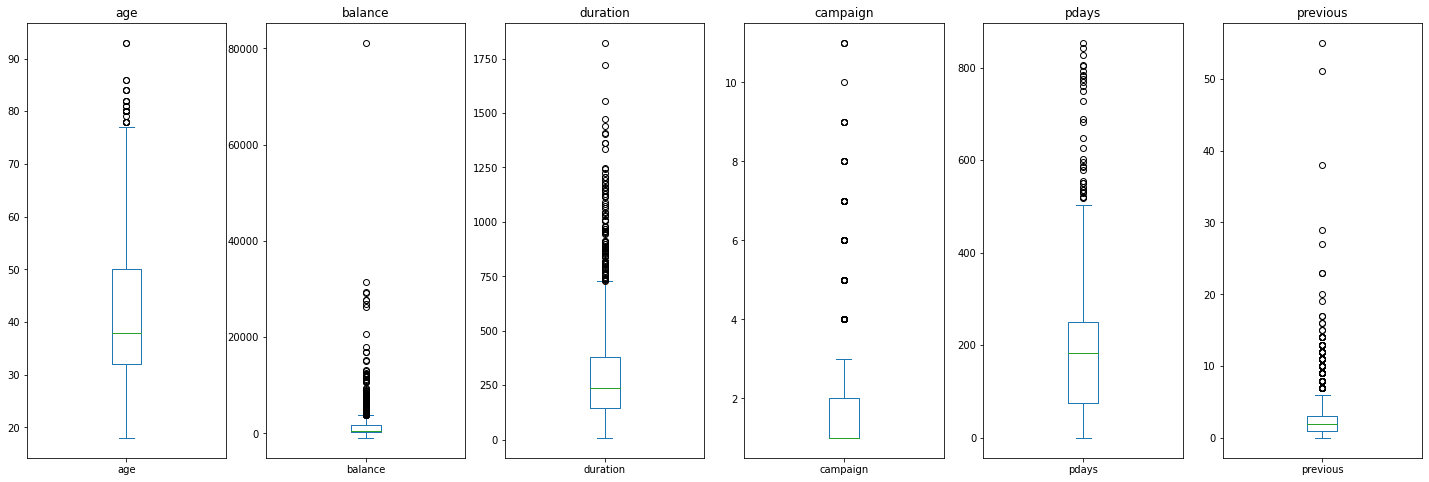

In [21]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(1, len(numerical_features), figsize=(25,8))
for i, numerical_feature in enumerate(data[numerical_features]):
    data_copy[numerical_feature].plot(kind="box", ax=ax[i]).set_title(numerical_feature)

Taking a look at these numerical features, the campaign feature looks to have its values occur at constant intervals as opposed to being continous in nature, we will have a closer look at the feature to better understand its nature as we may need to scale it in a different way than how we scale the othere numerical features above.

<AxesSubplot:>

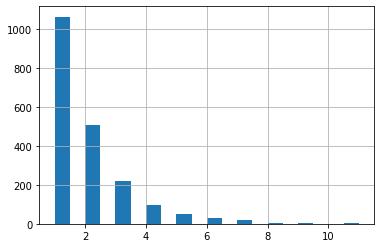

In [22]:
data_copy['campaign'].hist(bins=20)

In [23]:
data_copy['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

Since the values for campaign only range from 1 to 10, we can conclude that none of the values are actually outliers, this means we can apply a different type of scaler to this feature than the RobustScaler we will apply to rest of the non-ordinal numerical features. We will apply the min max scaler to campaign.

The scaling of the numerical features is carried out below

In [24]:
data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,32.0,392,0.032258,0.333333,957,2,131,2,0,1,...,0,0,0,0,0,0,1,0,0,1
1,39.0,688,0.032258,0.333333,233,2,133,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,59.0,1035,0.032258,0.333333,126,2,239,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,398,0.032258,0.333333,274,1,238,2,1,0,...,0,0,0,0,0,0,0,0,1,0
4,54.0,1004,0.032258,0.333333,479,1,307,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
min_max_scaler = MinMaxScaler()

data_copy['campaign'] = min_max_scaler.fit_transform(data_copy['campaign'].values.reshape(-1,1))

In [26]:
data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,32.0,392,0.032258,0.333333,957,0.1,131,2,0,1,...,0,0,0,0,0,0,1,0,0,1
1,39.0,688,0.032258,0.333333,233,0.1,133,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,59.0,1035,0.032258,0.333333,126,0.1,239,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,398,0.032258,0.333333,274,0.0,238,2,1,0,...,0,0,0,0,0,0,0,0,1,0
4,54.0,1004,0.032258,0.333333,479,0.0,307,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
non_ordinal_numerical = ['age', 'balance', 'duration', 'pdays', 'previous']

In [28]:
robust_scaler = RobustScaler()

data_copy[non_ordinal_numerical] = robust_scaler.fit_transform(data_copy[non_ordinal_numerical])

data_copy.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_secondary,education_tertiary
0,-0.333333,-0.110187,0.032258,0.333333,3.094421,0.1,-0.291013,0.0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0.055556,0.094941,0.032258,0.333333,-0.012876,0.1,-0.279601,-0.5,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1.166667,0.335412,0.032258,0.333333,-0.472103,0.1,0.325250,-0.5,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.500000,-0.106029,0.032258,0.333333,0.163090,0.0,0.319544,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.888889,0.313929,0.032258,0.333333,1.042918,0.0,0.713267,-0.5,1,0,...,0,0,1,0,0,0,0,0,1,0


After rescaling the features, below we have a look at the spread of the data using box plots

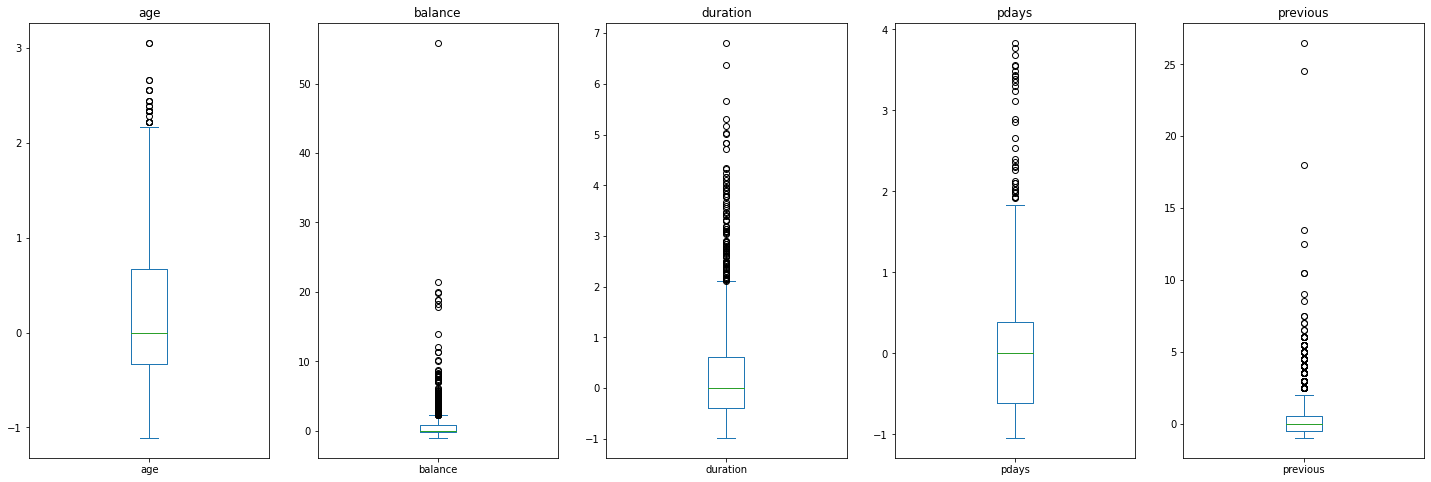

In [29]:
fig, ax = plt.subplots(1, len(non_ordinal_numerical), figsize=(25,8))
for i, numerical_feature in enumerate(data[non_ordinal_numerical]):
    data_copy[numerical_feature].plot(kind="box", ax=ax[i]).set_title(numerical_feature)

Although the values are scaled we can see that there are still outliers in the data as well as certain skews in the features, below we display histograms of each of the numerical features to better illustrate the skews and outliers present in the data.

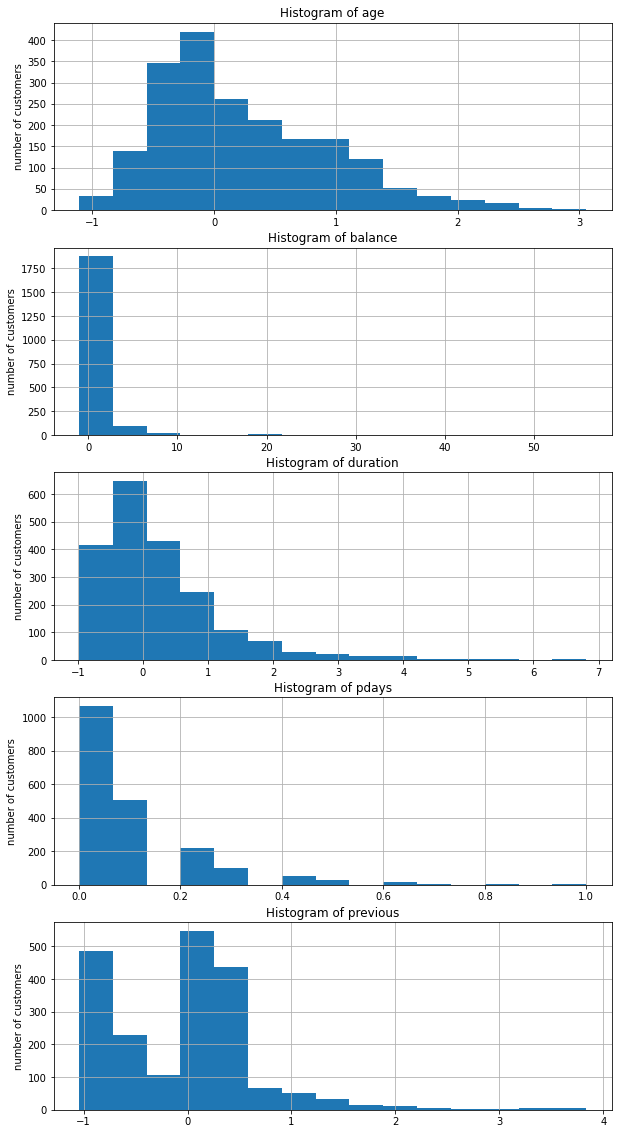

In [30]:
# Create figure with two subplots
fig = plt.figure(figsize=(10,20))
count = 0
for i in range(5):
    count = count + 1
    ax = fig.add_subplot(5, 1, count)
    ax.set_title(f"Histogram of {non_ordinal_numerical[count -1]}")
    ax.set_ylabel(f"{non_ordinal_numerical[count-1]}")
    ax.set_ylabel("number of customers")
    data_copy[numerical_features[count-1]].hist(bins=15)

plt.show()

We can see that all the numerical columns after scaling are skewed to the left and contain outliers of some kind. Since we have a dataset of only 2000 rows and would like to preserve this number, we are going to steer clear of removing these outlier values and instead transform the data to adhere to a more normal Gaussian distribution. As well as wanting to preserve the size of the dataset, in each of these numerical features the likelihood of the extreme values occurring is also quite small e.g. probability of a person being very old, probability of person having an incredibly large balance, having a person be called a very high number of times for this campaign or previous ones. As a result, performing some kind of transformation on these features makes sense.

We can firstly look at the minimum values of each column to see if negative values are present in any of the columns as presence of negative values will affect the nature of our transformation.

In [31]:
data_copy[non_ordinal_numerical].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
pdays      -1.044223
previous   -1.000000
dtype: float64

Given negative values are possible for after scaling, we will have to shift values upwards before we apply the log transform. We are applying the log transform due to the slightly exponential form of the data caused by the skewing of the values to one side of the distribution. The values are shifted by twice the minimum value to prevent division by 0 errors in the calculation

In [32]:
for feature in non_ordinal_numerical:
    min_value = abs(data_copy[non_ordinal_numerical].min()[feature])
    data_copy[feature] = np.log(data_copy[feature] + 2 * min_value)

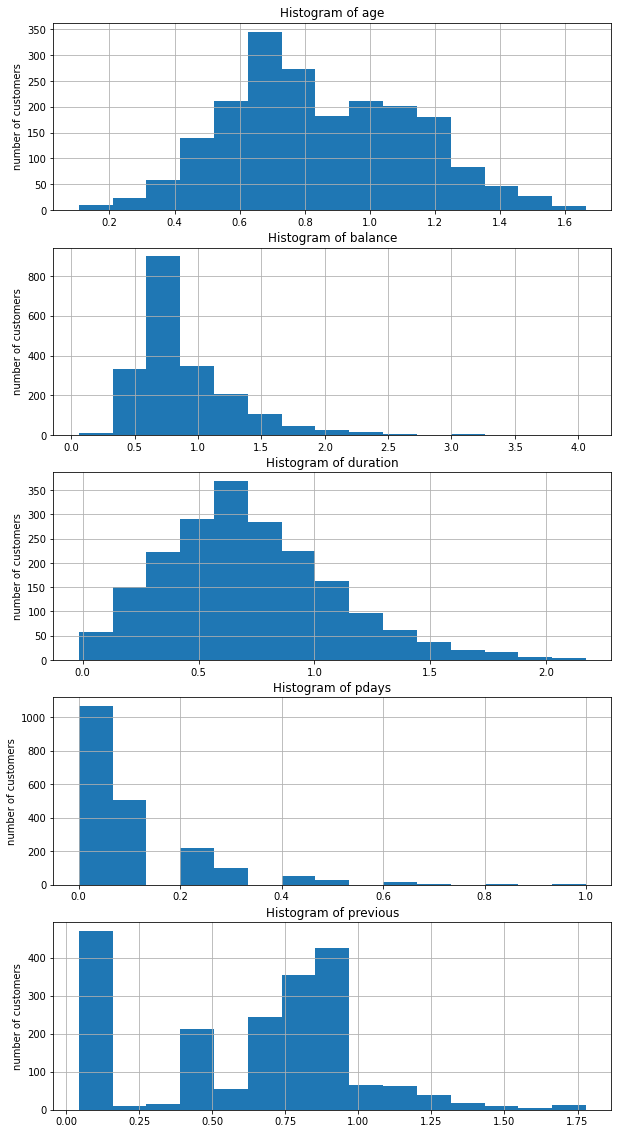

In [35]:
# Create figure with two subplots
fig = plt.figure(figsize=(10,20))
count = 0
for i in range(5):
    count = count + 1
    ax = fig.add_subplot(5, 1, count)
    ax.set_title(f"Histogram of {non_ordinal_numerical[count -1]}")
    ax.set_ylabel(f"{non_ordinal_numerical[count-1]}")
    ax.set_ylabel("number of customers")
    data_copy[numerical_features[count-1]].hist(bins=15)

plt.show()

The non-ordinal numerical columns have been successfully transformed to follow a more normal distribution, however this is not the case for the pdays column. We can have a more detailed look at this column in hopes to create a new feature that could potentially approximate this or be uses instead of this.

In [46]:
data['pdays'].value_counts()

-1      454
 182     68
 181     62
 92      51
 91      41
       ... 
 109      1
 43       1
 82       1
 277      1
 409      1
Name: pdays, Length: 363, dtype: int64

It looks like a lot of the values are dominated by -1, for the sake of this etivity we are going to assume that this means the person was not previously contacted.

In [47]:
data['previous'].value_counts()

0     454
1     438
2     407
3     240
4     150
5      85
6      57
7      44
8      32
9      23
10     19
11     12
12      9
13      8
14      7
23      2
15      2
16      2
17      2
27      1
38      1
29      1
51      1
20      1
55      1
19      1
Name: previous, dtype: int64

In [48]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
